ImageView object:
  Display bands       :  [0, 3, 6]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 20110.0]
    G: [0.0, 15252.0]
    B: [0.0, 12581.0]

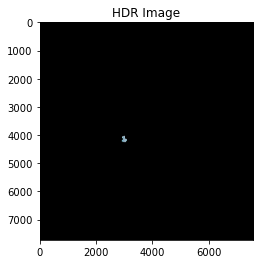

In [1]:
import spectral
from spectral import io
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Load the image
img = io.envi.open('ApplyMask_2013.hdr')
img


# Customize the display with additional parameters
spectral.imshow(img, cmap='gray', title='HDR Image')


In [2]:



# # Extract the bands
# band3 = img[:, :, 2]
# band4 = img[:, :, 3]
# band5 = img[:, :, 4]


nir_band = img[:, :, 5].astype(float) #5th
red_band = img[:, :, 4].astype(float) #3rd
swir_band = img[:, :,6].astype(float) #6th


# Compute NDVI, handling division by zero
denominator = nir_band + red_band
ndvi_data = np.zeros_like(denominator)
mask = denominator != 0
ndvi_data[mask] = (nir_band[mask] - red_band[mask]) / denominator[mask]
ndvi_data = np.nan_to_num(ndvi_data)

# Compute NDWI, handling division by zero
denominator = nir_band + swir_band
ndwi_data = np.zeros_like(denominator)
mask = denominator != 0
ndwi_data[mask] = (nir_band[mask] - swir_band[mask]) / denominator[mask]
ndwi_data = np.nan_to_num(ndwi_data)

# Compute NDBI, handling division by zero
denominator = swir_band + nir_band
ndbi_data = np.zeros_like(denominator)
mask = denominator != 0
ndbi_data[mask] = (swir_band[mask] - nir_band[mask]) / denominator[mask]
ndbi_data = np.nan_to_num(ndbi_data)




In [3]:
print(np.isnan(ndvi_data).sum())
print(np.isnan(ndwi_data).sum())
print(np.isnan(ndbi_data).sum())

0
0
0


In [3]:
import numpy as np
ndvi_count = np.count_nonzero(ndbi_data>0)
ndwi_count = np.count_nonzero(ndwi_data>0)
ndbi_count = np.count_nonzero(ndvi_data>0)
print('Number of non-zero values in NDVI:', ndvi_count)
print('Number of non-zero values in NDWI:', ndwi_count)
print('Number of non-zero values in NDBI:', ndbi_count)

Number of non-zero values in NDVI: 59
Number of non-zero values in NDWI: 28009
Number of non-zero values in NDBI: 4


In [6]:
import numpy as np
import pandas as pd

# Assuming ndvi_data, ndwi_data, and ndbi_data are the 2D arrays you want to save
ndvi_data_float = ndvi_data.astype(float)
ndwi_data_float = ndwi_data.astype(float)
ndbi_data_float = ndbi_data.astype(float)

In [12]:
# Create DataFrames and save to CSV
df_ndvi = pd.DataFrame({'ndvi': ndvi_data_float.ravel()})
df_ndvi = df_ndvi[df_ndvi['ndvi'] > 0]
df_ndvi.to_csv('ndvi_data.csv', index=False)


In [13]:
df_ndwi = pd.DataFrame({'ndwi': ndwi_data_float.ravel()})
df_ndwi = df_ndwi[df_ndwi['ndwi'] > 0]
df_ndwi.to_csv('ndwi_data.csv', index=False)

In [14]:
df_ndbi = pd.DataFrame({'ndbi': ndbi_data_float.ravel()})
df_ndbi = df_ndbi[df_ndbi['ndbi'] > 0]
df_ndbi.to_csv('ndbi_data.csv', index=False)

In [10]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df1 = pd.read_csv('ndbi_data.csv')


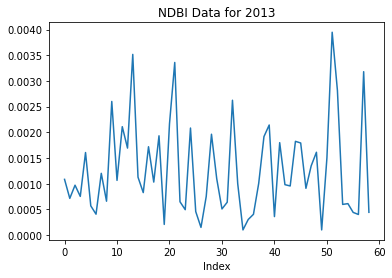

In [17]:
# Extract the NDBI values and plot them against the index values
plt.plot(df1['ndbi'])

# Set the x-axis label and title
plt.xlabel('Index')
plt.title('NDBI Data for 2013')

# Display the plot
plt.show()

In [23]:
df1.describe()

,ndbi
count,59.000000
mean,0.001275
std,0.000916
min,0.000100
25%,0.000583
50%,0.001006
75%,0.001811
max,0.003947


In [13]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df2 = pd.read_csv('ndwi_data.csv')


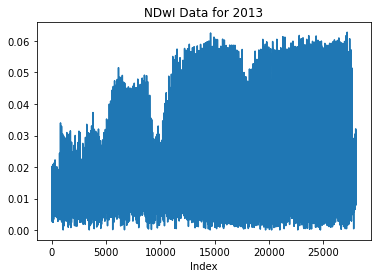

In [15]:
# Extract the NDWI values and plot them against the index values
plt.plot(df2['ndwi'])

# Set the x-axis label and title
plt.xlabel('Index')
plt.title('NDwI Data for 2013')

# Display the plot
plt.show()

In [21]:
df2.describe()

,ndwi
count,28009.000000
mean,0.017143
std,0.012537
min,0.000049
25%,0.008967
50%,0.013991
75%,0.019716
max,0.062765


In [19]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df3 = pd.read_csv('ndvi_data.csv')


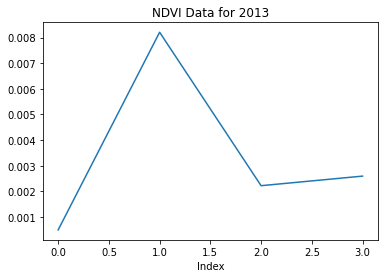

In [24]:
# Extract the NDBI values and plot them against the index values
plt.plot(df3['ndvi'])

# Set the x-axis label and title
plt.xlabel('Index')
plt.title('NDVI Data for 2013')

# Display the plot
plt.show()

In [22]:
df3.describe()

,ndvi
count,4.000000
mean,0.003381
std,0.003344
min,0.000499
25%,0.001792
50%,0.002410
75%,0.003999
max,0.008206


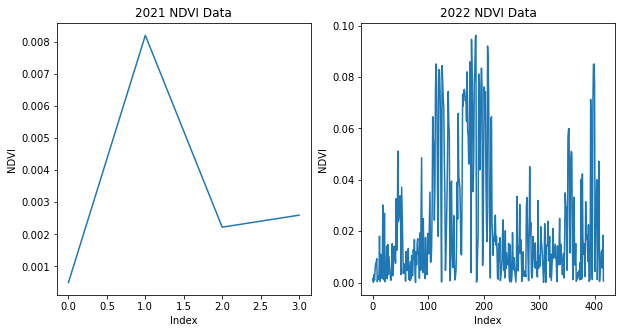

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data for both years into separate data frames
df_2021 = pd.read_csv('ndvi_data.csv')
df_2022 = pd.read_csv('ndvi_data_2022.csv')

# Create a single plot with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Plot the NDVI values for each year in their respective subplots
axs[0].plot(df_2021['ndvi'])
axs[1].plot(df_2022['ndvi'])

# Add titles and labels to the plot as necessary
axs[0].set_title('2021 NDVI Data')
axs[1].set_title('2022 NDVI Data')
axs[0].set_xlabel('Index')
axs[1].set_xlabel('Index')
axs[0].set_ylabel('NDVI')
axs[1].set_ylabel('NDVI')
plt.show()


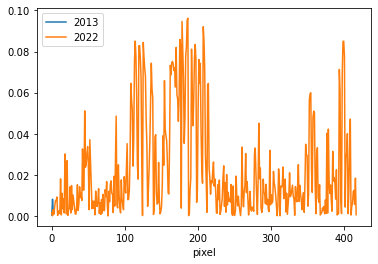

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the NDVI data for two years
ndvi_2021 = pd.read_csv('ndvi_data.csv')
ndvi_2022 = pd.read_csv('ndvi_data_2022.csv')

# Plot the two years of NDVI data on the same graph
plt.plot(ndvi_2021['ndvi'], label='2013')
plt.plot(ndvi_2022['ndvi'], label='2022')

# Set the x-axis label and legend
plt.xlabel('pixel')
plt.legend()

# Show the plot
plt.show()


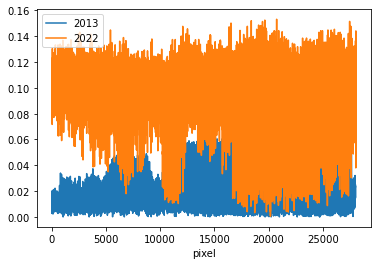

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the NDVI data for two years
ndwi_2013 = pd.read_csv('ndwi_data.csv')
ndwi_2022 = pd.read_csv('ndwi_data_2022.csv')

# Plot the two years of NDVI data on the same graph
plt.plot(ndwi_2013['ndwi'], label='2013')
plt.plot(ndwi_2022['ndwi'], label='2022')

# Set the x-axis label and legend
plt.xlabel('pixel')
plt.legend()

# Show the plot
plt.show()


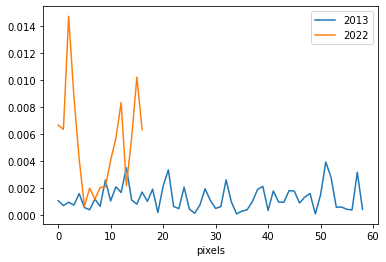

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the NDVI data for two years
ndbi_2013 = pd.read_csv('ndbi_data.csv')
ndbi_2022 = pd.read_csv('ndbi_data_2022.csv')

# Plot the two years of NDVI data on the same graph
plt.plot(ndbi_2013['ndbi'], label='2013')
plt.plot(ndbi_2022['ndbi'], label='2022')

# Set the x-axis label and legend
plt.xlabel('pixels')
plt.legend()

# Show the plot
plt.show()
